In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import torch
from utils import *
from rsigw1 import *
from sigw1 import *
from generators import *
from evaluation import *
from data import *
from config import *
import config
import generators


def get_generator(name):
    if name == "NeuralSDE":
        return NeuralSDEGenerator(N_LAGS, INPUT_DIM_NSDE, DATA_DIM, RESERVOIR_DIM_GEN, BROWNIAN_DIM, get_activation(ACTIVATION_ID))
    elif name == "LSTM":
        return LSTMGenerator(INPUT_DIM_LSTM, DATA_DIM, HIDDEN_DIM_LSTM, NUM_LAYERS_LSTM)

def get_training(name, data_train, data_val):
    if name == "RSigW1":
        return RSigWGANTraining(data_train, data_val, BATCH_SIZE, get_generator(GENERATOR_ID), GRADIENT_STEPS,
                                LEARNING_RATE, RESERVOIR_DIM_METRIC, DATA_DIM, get_activation(ACTIVATION_ID))
    elif name == "SigW1":
        return SigWGANTraining(data_train, data_val, BATCH_SIZE, get_generator(GENERATOR_ID), GRADIENT_STEPS,
                               LEARNING_RATE, TRUNCATION_DEPTH, NORMALISE_SIG)




In [18]:
torch.autograd.set_detect_anomaly(True)
data = get_data(DATA_ID)[0]
data_train, data_val, data_test = get_data(DATA_ID)[1]

torch.Size([1000, 61, 1])


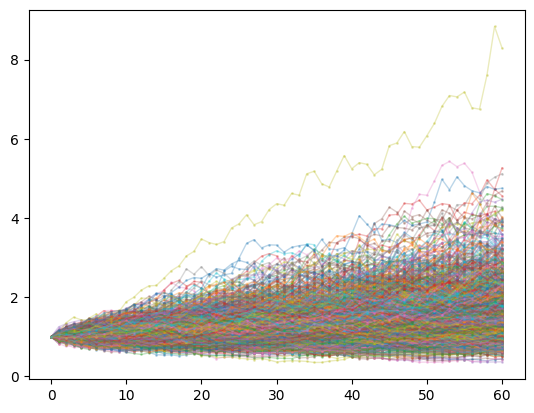

In [19]:
import matplotlib.pyplot as plt 
import numpy as np 

def visualize_data(data, dim = 0):
    data = data.numpy()
    plt.plot(data[:1000][...,dim].T, alpha=0.3, marker='o',linewidth=1, markersize=1)
visualize_data(data_train)
print(data_train.shape)

In [20]:
training = get_training(DISCRIMINATOR_ID, data_train, data_val)
training.fit()

In [21]:
# training.generator.load_state_dict(torch.load('./path/BS/NeuralSDE-RSigW1-Sigmoid()-10-01092024-104421.pt'))
# training.generator.load_state_dict(torch.load('./path/BS/NeuralSDE-RSigW1-Sigmoid()-10-01092024-105434.pt'))

<All keys matched successfully>

In [22]:
evaluation = Evaluation(training, data_train, data_test, data.scaler, GENERATOR_ID, DISCRIMINATOR_ID, ACTIVATION_ID, DATA_ID)

In [23]:
# evaluation.print_summary()
# evaluation.plot_paths(50)

In [24]:
x_fake = evaluation.save_to_compare(n_samples=10000)

In [26]:
torch.save(x_fake.detach(), f"path/BS/fake.pt")